In [9]:
#pip show numpy   pip install --upgrade numpy==1.24.3
pip install quspin


SyntaxError: invalid syntax (2590091536.py, line 2)

In [1]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### 1D XXZ Hamiltonian

L=12 #size of system
length=12.0 #length of system
r = length/L #seperation of particles
theta = 0.0 #angle of system with quantisation axis
ans = (1-(3*(np.cos(theta)**2)))/(r**3) #anisotropic term
mJ, mJz = 1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0) #(dipole) matrix elements

#spin operator coefficients
J = (0.25)*mJ*ans
Jz = (0.5)*mJz*ans

#construct Hamiltonian
def XXZ(L, J, Jz):
    basis = spin_basis_1d(L, pauli=False, Nup=L//2, pblock=1)
    J_ = [[J, i, i+1] for i in range(L-1)]
    J_z = [[Jz, i, i+1] for i in range(L-1)]
    static = [["+-", J_], ["-+", J_], ["zz", J_z]]
    dynamic = []
    H_XXZ = hamiltonian(static, dynamic, basis=basis, dtype=np.float64, check_herm=False, check_symm=False)
    return H_XXZ

In [5]:
theta = 0.0 #angle of system with quantisation axis
mJ, mJz = 1.0/np.sqrt(2.0), 1.0/np.sqrt(2.0) #(dipole) matrix elements
L=20 #size of system

itr = 0
bnd = [] #to be filled with bandwidths
rs = [] #to be filled with corresponding particle seperations

for i in range(15):
    length=20 - i #length of system
    rs = rs + [length]
    r = length/L #seperation of particles
    ans = (1-(3*(np.cos(theta)**2)))/(r**3) #anisotropic term

    #spin operator coefficients
    J = (0.25)*mJ*ans
    Jz = (0.5)*mJz*ans
    
    H_XXZ = XXZ(L, J, Jz)
    
    Emin,Emax=H_XXZ.eigsh(k=2,which="BE",maxiter=1E4,return_eigenvectors=False)
    print(Emin, Emax)
    bnd = bnd + [Emax-Emin]


Particle conservation check passed!
-3.358757210636101 6.139435772224885
Particle conservation check passed!
-3.9174890924462336 7.160735701676495
Particle conservation check passed!
-4.607348711434971 8.421722595644558
Particle conservation check passed!
-5.469175185240943 9.997045833054965
Particle conservation check passed!
-6.56007267702362 11.991085492626711
Particle conservation check passed!
-7.96149857335962 14.552736645273807
Particle conservation check passed!
-9.792295074740863 17.899229656632308
Particle conservation check passed!
-12.230340320932513 22.355706043604478
Particle conservation check passed!
-15.549801901093064 28.423313760300402
Particle conservation check passed!
-20.187872039886262 36.901191718857234
Particle conservation check passed!
-26.870057685088664 49.11548617779894
Particle conservation check passed!
-36.858789691479615 67.37378076515634
Particle conservation check passed!
-52.48058141618858 95.92868394101376
Particle conservation check passed!
-78.3

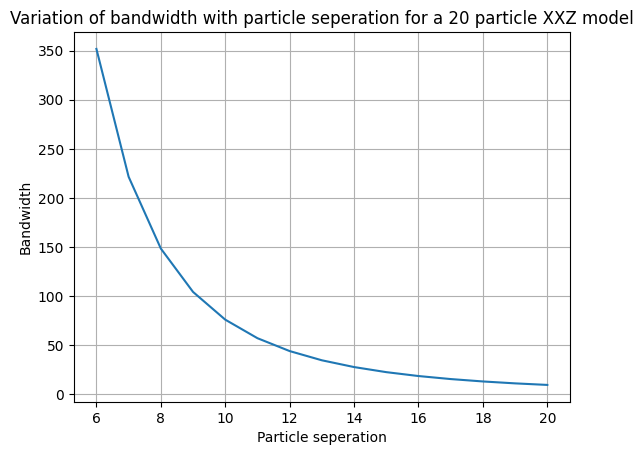

In [68]:
fig, ax = plt.subplots()
ax.plot(rs, bnd)

ax.set(xlabel='Particle seperation', ylabel='Bandwidth',
       title=f'Variation of bandwidth with particle seperation for a {L} particle XXZ model')
ax.grid()

plt.show()